In [39]:
%display latex

In [98]:
def newton_solve(f, p0, eps, max_iter=100, m=1):
    fd = diff(f)
    for i in range(max_iter):
        p = p0 - m * f(p0) / fd(p0)
        p = p.n()
        if abs(p - p0) < eps:
            print(f"converged after {i} iterations")
            return p
        p0 = p
    raise RuntimeError(f"could not find value with satisfactory precision after {max_iter} iterations")

In [99]:
def newton_solve_sys(f, v, eps, x0, max_iter=100, m=1):
    J = jacobian(f, v)
    for i in range(max_iter):
        x = x0 - m * J(*x0) ** -1 * f(*x0)
        x = x.n()
        if abs(x - x0) < eps:
            print(f"converged after {i} iterations")
            return x
        x0 = x
    
    raise RuntimeError(f"could not find value with satisfactory precision after {max_iter} iterations")

In [94]:
x = var("x")
f = (x**2 / 2 + x + 1 - e**x).function(x)
x0 = 1
sol = newton_solve_sys(vector([f]), vector([x]), 10**-10, vector([x0]))[0]
sol

converged after 30 iterations


4.67982253441587e-6

In [95]:
alpha = var("alpha")
g = x - f / diff(f, x)
# display(g)
display(g)
# display(ga.substitute(f(alpha) == 0))
gd = diff(g, x)
display(gd(sol))
# display(fd)

# plot(gd, (-100, 150))
# plot(x**2 + 2*x - 2*e**x + 2, (-100, 100))

# plot(x**2 + 2*x - 2*e**x + 2, (0, 100))

x |--> x - 1/2*(x^2 + 2*x - 2*e^x + 2)/(x - e^x + 1)

-0.000000000000000

inseamna ca probabil gradul de multiplicitate este >1 => convergenta liniara

Algoritmul este mai rapid daca se cunoaste gradul de multiplicitate.

In [97]:
gdd = diff(gd, x)
display(gdd)
display(gdd(sol))

x |--> -(e^x - 1)/(x - e^x + 1) - (x^2 + 2*x - 2*e^x + 2)*(e^x - 1)^2/(x - e^x + 1)^3 - 1/2*(x^2 + 2*x - 2*e^x + 2)*e^x/(x - e^x + 1)^2

427368.325452186

Presupunem ca gradul de multiplicitate m=2

In [100]:
sol = newton_solve_sys(vector([f]), vector([x]), 10**-10, vector([x0]), m=2)[0]
sol

converged after 19 iterations


7.54896292367307e-6

# Asta e gresit cred

In [60]:
solve(e**x-1 == 0, x)

[x == 0]

In [73]:
q = (x**2 + 2*x + 2 - 2*e**x).function(x)
q

x |--> x^2 + 2*x - 2*e^x + 2

x |--> x^2 + 2*x - 2*e^x + 2

x |--> 2*x - 2*e^x + 2

x |--> -2*e^x + 2

[x == 0]

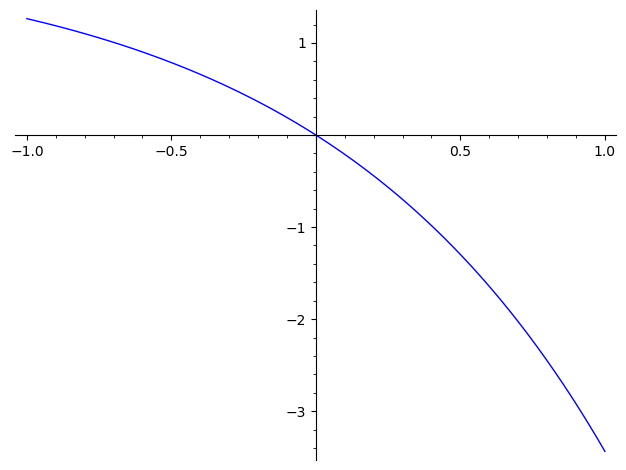

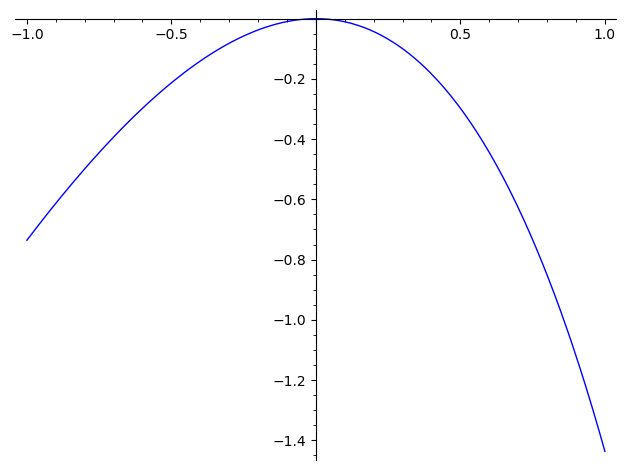

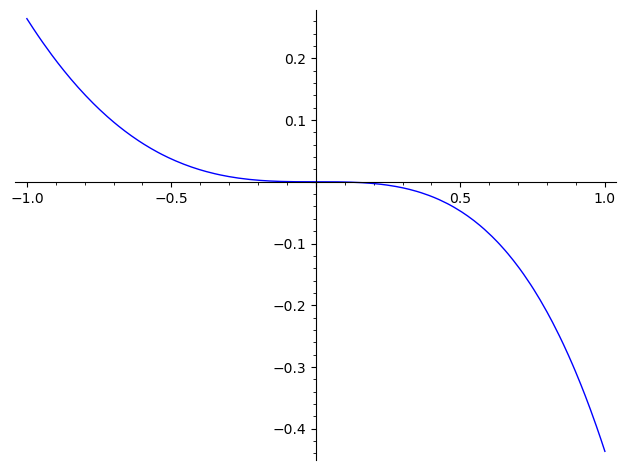

0

In [88]:
display(q)
qd = diff(q, x)
display(qd)
qdd = diff(qd, x)
display(qdd)

qdd0 = solve(qdd == 0, x)
display(qdd0)
plot(qdd, (-1, 1)).show()
# x < 0 => qd desc
# x > 0 => qd cresc


plot(qd, (-1, 1)).show()

# qd(x) = 0 => x=0
# x < 0 => q cresc
# x > 0 => q desc

plot(q, (-1, 1)).show()
display(q(0))

# =>
# x < 0 => q(x) > 0
# x > 0 => q(x) < 0